In [3]:
from PIL import Image 
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
dot = Image.open('tutorialimages/images/dot.png')

In [17]:
dotarr = np.asarray(dot)

In [15]:
print(dotarr)

[[[  0   0   0 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 2

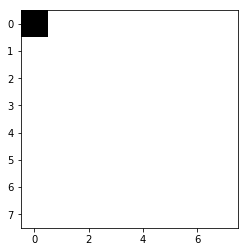

In [20]:
plt.imshow(dotarr);

In [43]:
#To convert all the images into black and white images
import functools
def threshold(imagearray):
    balancearr = []
    newarr = imagearray
    for eachrow in imagearray:
        for eachpix in eachrow:
            avgnum = functools.reduce(lambda x, y: x+y, eachpix[:3])/len(eachpix[:3])
            balancearr.append(avgnum)
        balance = functools.reduce(lambda x, y: x+y, balancearr)/len(balancearr)
        
    for eachroww in newarr:
        for eachpixx in eachroww:
            if (functools.reduce(lambda x,y:x+y, eachpixx[:3])/len(eachpixx[:3])) > balance:
                eachpixx[0] = 255
                eachpixx[1] = 255
                eachpixx[2] = 255
                eachpixx[3] = 255
            else:
                eachpixx[0] = 0
                eachpixx[1] = 0
                eachpixx[2] = 0
                eachpixx[3] = 255
    return newarr

In [55]:
i = Image.open('tutorialimages/images/numbers/0.1.png')
iar = np.array(i)

i2 = Image.open('tutorialimages/images/numbers/y0.4.png')
iar2 = np.array(i2)

i3 = Image.open('tutorialimages/images/numbers/y0.5.png')
iar3 = np.array(i3)

i4 = Image.open('tutorialimages/images/sentdex.png')
iar4 = np.array(i4)

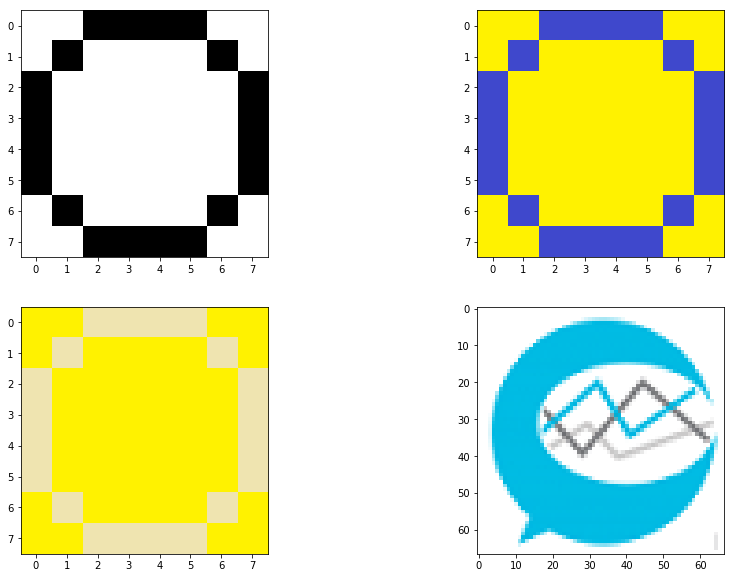

In [56]:
#Ploting different images
f, plot1= plt.subplots(2,2, figsize=(15,10))

plot1[0][0].imshow(iar)

plot1[0][1].imshow(iar2)

plot1[1][0].imshow(iar3)

plot1[1][1].imshow(iar4);

In [57]:
iar3 = threshold(iar3)
iar = threshold(iar)
iar2 = threshold(iar2)
iar4 = threshold(iar4)

C:\Users\Dhiraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
C:\Users\Dhiraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


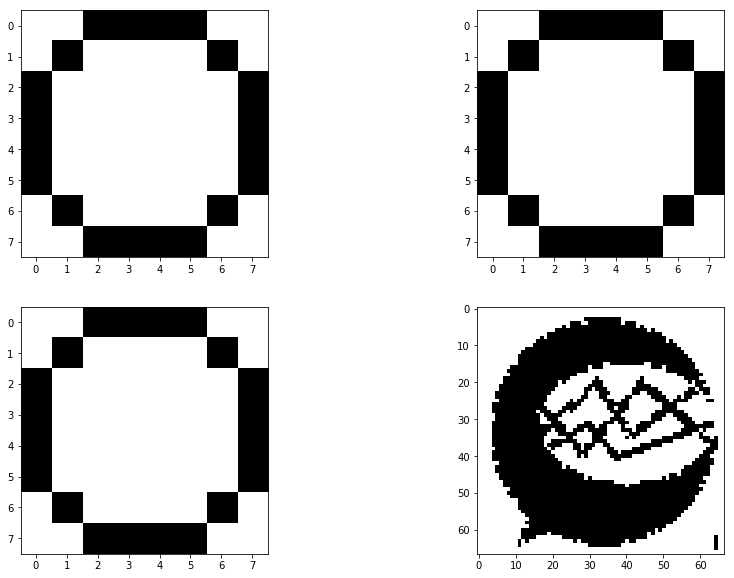

In [58]:
#Ploting different images after changing it into black n white colours
f, plot1= plt.subplots(2,2, figsize=(15,10))

plot1[0][0].imshow(iar)

plot1[0][1].imshow(iar2)

plot1[1][0].imshow(iar3)

plot1[1][1].imshow(iar4);

In [60]:
#a way to edit array
a = np.arange(6)
a.setflags(write=True)
a[4] = 6

In [72]:
#To create a text file which contains all the examples.
def createexamples():
    numberarrayexamples = open('numarex.txt', 'a')
    numberswehave = range(0,10)
    versionswehave = range(1,10)
    
    for eachnum in numberswehave:
        for eachvar in versionswehave:
            #print(str(eachnum)+'.'+str(eachvar))
            #the above code will print 0.0, 0.1...0.9,1.1... which we will use to input our files as this resembles the name of the file
            
            imgfilepath = 'tutorialimages/images/numbers/'+ str(eachnum)+'.'+str(eachvar)+'.png'
            ei = Image.open(imgfilepath)
            eiar = np.array(ei)
            eiar1 = str(eiar.tolist())
            
            linetowrite = str(eachnum) + '::'+eiar1+'\n'
            numberarrayexamples.write(linetowrite)

In [73]:
createexamples()

In [98]:
from collections import Counter
def whatnumisthis(filepath):
    matchedar = []
    loadexamps = open('numarex.txt','r').read()
    loadexamps = loadexamps.split('\n')
    
    i =Image.open(filepath)
    iar = np.array(i)
    iarl = iar.tolist()
    
    inquestion = str(iarl)
    
    for eachexample in loadexamps:
        if len(eachexample) > 3:
            splitex = eachexample.split('::')
            currentnum = splitex[0]
            currentar = splitex[1]
            
            eachpixex = currentar.split('],')
            eachpixinq = inquestion.split('],')
            
            x = 0
            while x < len(eachpixex):
                if eachpixex[x] == eachpixinq[x]:
                    matchedar.append(int(currentnum))
                x += 1
    print(matchedar)
    x = Counter(matchedar)
    print(x)
    
    graphx = []
    graphy = []
    
    for eachthing in x:
        print(eachthing)
        graphx.append(eachthing)
        print(x[eachthing])
        graphy.append(x[eachthing])
        
    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4), (0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4), (1,0), rowspan=3, colspan=4)
        
    ax1.imshow(iar)
    ax2.bar(graphx, graphy, align = 'center')
    plt.ylim(250)
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)
        
    #plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

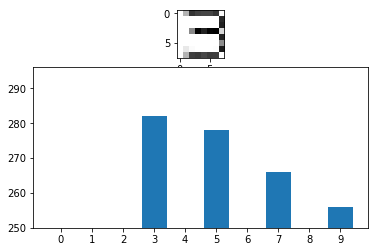

In [99]:
whatnumisthis('tutorialimages/images/test.png')